<h1><center> Part A: Exploratory Data Analysis </center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import sklearn
import matplotlib.pyplot as plt
from array import array
from random import randrange
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict


df=pd.read_csv("spambase.csv")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [2]:
feature_names=["word_freq_make:         continuous.","word_freq_address:      continuous.","word_freq_all:          continuous.","word_freq_3d:           continuous.",
"word_freq_our:          continuous.","word_freq_over:         continuous.","word_freq_remove:       continuous.","word_freq_internet:     continuous.",
"word_freq_order:        continuous.","word_freq_mail:         continuous.","word_freq_receive:      continuous.","word_freq_will:         continuous.",
"word_freq_people:       continuous.","word_freq_report:       continuous.","word_freq_addresses:    continuous.","word_freq_free:         continuous.",
"word_freq_business:     continuous.","word_freq_email:        continuous.","word_freq_you:          continuous.",
"word_freq_credit:       continuous.","word_freq_your:         continuous.",
"word_freq_font:         continuous.","word_freq_000:          continuous.",
"word_freq_money:        continuous.","word_freq_hp:           continuous.",
"word_freq_hpl:          continuous.","word_freq_george:       continuous.",
"word_freq_650:          continuous.","word_freq_lab:          continuous.",
"word_freq_labs:         continuous.","word_freq_telnet:       continuous.",
"word_freq_857:          continuous.","word_freq_data:         continuous.",
"word_freq_415:          continuous.","word_freq_85:           continuous.",
"word_freq_technology:   continuous.","word_freq_1999:         continuous.",
"word_freq_parts:        continuous.","word_freq_pm:           continuous.",
"word_freq_direct:       continuous.","word_freq_cs:           continuous.",
"word_freq_meeting:      continuous.","word_freq_original:     continuous.",
"word_freq_project:      continuous.","word_freq_re:           continuous.",
"word_freq_edu:          continuous.","word_freq_table:        continuous.",
"word_freq_conference:   continuous.","char_freq_;:            continuous.",
"char_freq_(:            continuous.","char_freq_[:            continuous.",
"char_freq_!:            continuous.","char_freq_$:            continuous.",
"char_freq_#:            continuous.","capital_run_length_average: continuous.",
"capital_run_length_longest: continuous.","capital_run_length_total:   continuous."]

for i in range(len(feature_names)):
    feature_names[i]=feature_names[i].replace("continuous.","")
    feature_names[i]=feature_names[i].rstrip()
    feature_names[i]=feature_names[i].replace(":","")
    
feature_names.append("target")
len(feature_names)

58

In [3]:
data=pd.read_csv("spambase.csv",names=feature_names)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
data.shape

(4601, 58)

In [7]:
spam_count=ham_count=0
for i in range(len(data['target'])):
    if data['target'][i]==0:
        ham_count=ham_count+1
    else:
        spam_count=spam_count+1
print("Total hams:",ham_count)
print("Total spams:",spam_count)

Total hams: 2788
Total spams: 1813


<AxesSubplot: xlabel='target', ylabel='count'>

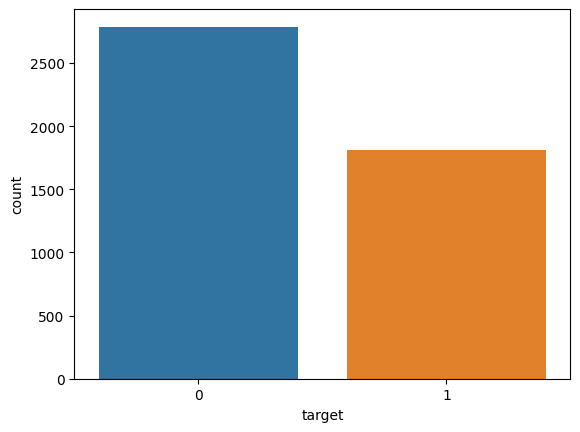

In [8]:
sns.countplot(x=data['target'])

In [9]:
data_target=data['target']
data_features=data.drop(['target'],axis=1)
print(data_target.shape)
print(data_features.shape)

(4601,)
(4601, 57)


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data_features,data_target,test_size=0.2,random_state=0)
print("Training set of feature matrix:",X_train.shape)
print("Testing set of features matrix:",X_test.shape)
print("Training set of target vector:",y_train.shape)
print("Testing set of target vector:",y_test.shape)

Training set of feature matrix: (3680, 57)
Testing set of features matrix: (921, 57)
Training set of target vector: (3680,)
Testing set of target vector: (921,)


<h1><center> Part 2: Train the Logistic Regression model called logistic_clf. </center></h1>

In [11]:
logistic_clf = LogisticRegression(solver='sag',penalty="l2",max_iter=10000,C=0.0001,verbose=1).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4935 epochs took 34 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.7s finished


In [12]:
preds=cross_val_predict(logistic_clf,X_train,y_train,cv=3,method='predict_proba')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4824 epochs took 22 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 5032 epochs took 23 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4595 epochs took 21 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.9s finished


<h1><center> Part 3: Analyze Model performance </center></h1>

In [13]:
pred=[]
for i in preds:
    pred.append(i[1])
    
pred=np.asarray(pred)
pred

array([0.51119443, 0.93795086, 0.51295475, ..., 0.68805252, 0.47459273,
       0.47698095])

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred)

In [15]:
g_mean=[]
for i in range(len(fpr)):
    g_mean.append((tpr[i]*(1-fpr[i])**0.5))
ind=np.argmax(g_mean)
print(f"The optimal threshold is {thresholds[ind]}")

The optimal threshold is 0.49889982406868566


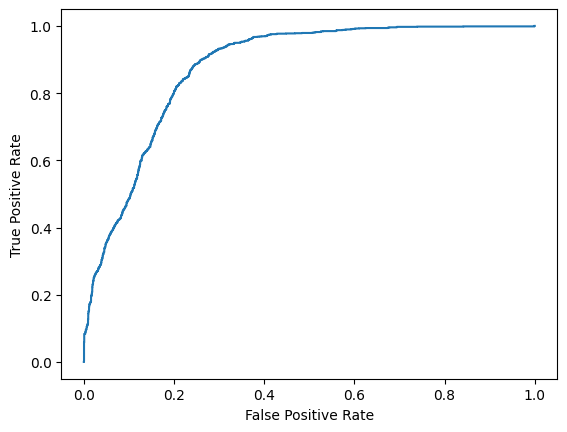

In [16]:
d=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
d.plot()

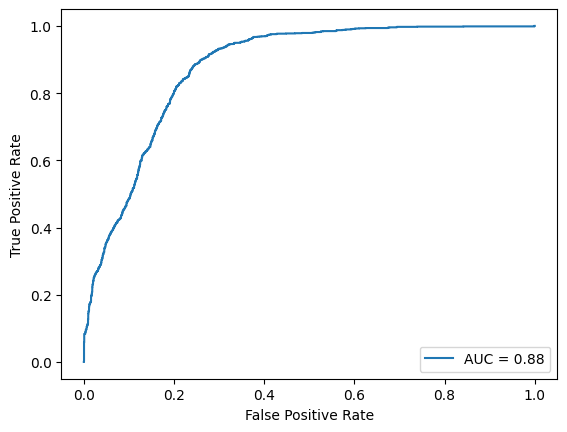

In [17]:
area=metrics.auc(fpr,tpr)
da=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=area)
da.plot()

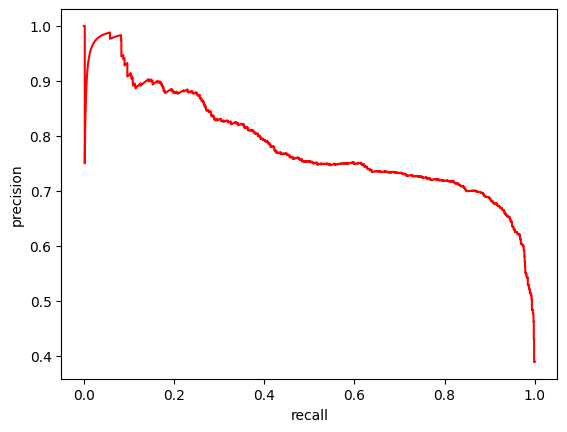

In [18]:
precision,recall,thresholds=metrics.precision_recall_curve(y_train, pred)

figs,graph=plt.subplots()
graph.plot(recall,precision,color="red")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

<h1><center> Part 4: Evaluate the model on test data. </center></h1>

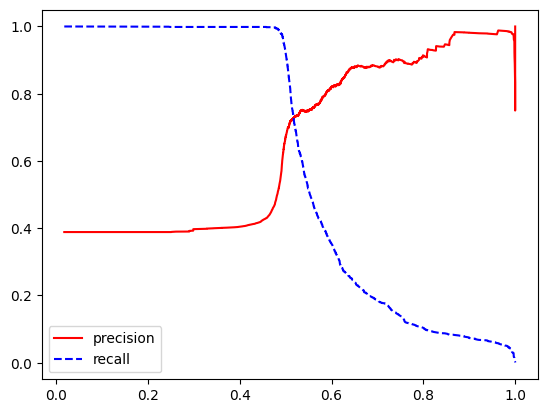

In [19]:
plt.plot(thresholds,precision[:-1],'r',thresholds,recall[:-1],'--b')
plt.legend(['precision','recall'])

In [20]:
test_preds=logistic_clf.predict_proba(X_test)
test_pred=[]
for i in test_preds:
    test_pred.append(i[1])
    
test_pred=np.asarray(test_pred)
test_pred

array([0.9977046 , 0.48640351, 0.42531401, 0.50272024, 0.33702129,
       0.27710471, 0.49266975, 0.48522032, 0.77194951, 0.36067058,
       0.62007742, 0.81244717, 0.9977046 , 0.74029522, 0.45846832,
       0.42528056, 0.98851926, 0.89124702, 0.5020012 , 0.49729504,
       0.521889  , 0.49584467, 0.46266046, 0.47803079, 0.5199767 ,
       0.50708807, 0.47653016, 0.497222  , 0.44574901, 0.50339619,
       0.41574996, 0.52896149, 0.61567072, 0.47097048, 0.52086868,
       0.73147149, 0.4834737 , 0.46799921, 0.40701381, 0.48253577,
       0.58620254, 0.507391  , 0.49643366, 0.51136321, 0.99476596,
       0.51810871, 0.3003872 , 0.49954945, 0.54670271, 0.5672434 ,
       0.48984   , 0.48735143, 0.50153034, 0.62914906, 0.67529627,
       0.48488942, 0.56047778, 0.4961887 , 0.99809404, 0.49679646,
       0.51334968, 0.48809183, 0.5227214 , 0.50492395, 0.50382538,
       0.55121667, 0.4505567 , 0.48373683, 0.52974849, 0.49816798,
       0.43419462, 0.4803838 , 0.92963393, 0.58717403, 0.91591

In [21]:
for i in range(len(test_pred)):
    if test_pred[i]<=thresholds[ind]:
        test_pred[i]=0
    else:
        test_pred[i]=1
metrics.confusion_matrix(y_test,test_pred)

array([[284, 254],
       [  3, 380]], dtype=int64)

In [22]:
precision = metrics.precision_score(y_test,test_pred)
print(precision)

0.5993690851735016


In [23]:
recall = metrics.recall_score(y_test,test_pred)
print(recall)

0.9921671018276762


In [24]:
f_score=metrics.f1_score(y_test,test_pred)
print(f_score)

0.7472959685349068


<h1><center> Part 5: Written Report </center></h1>

The sklearn function of logistic regression has multiple hyperparameters that we can tune in to get the best results. The parameters used here are the solver methods, C, penalty(regularization) and max_iter(maximum iterations that signifies the max number of epochs allowed). The defaul values of sklearn's logistic regression are 'lbfgs', 1.0, 'l2' and 100 respectively. 
After multiple executions with different permutations of hyperparameters, the set that outputs the best result on both, the cross validation of training data and the test set, is this: -
- solver = "sag"
- C = 0.0001
- penalty = "l2" norm
- max_iter = 10000 (since it was seen that the model takes at least 4000 epochs to converge)
- verbose (not a hyperparameter, just another way of displaying computation)

Analysing the above set, the "sag" is the Stochastic Average Gradient, which is an another version of Stochastic Gradient methods, but here the value of previous gradient is stored which results in a faster convergence rate. The value of C is 0.0001 since this strengthens the value of the regularization used.

Noticeably there is not a lot of difference between the performances of both the models used. In Logistic regression however, we are getting a little less number of false negatives, which is an important aspect of this project. The F1-score of logistic-clf is a little more than that of gaussianNB_clf, which can be counted as another plus. The downside to both the models is that there is a high number of false positives, which results in low precision. 
In logistic regression, unlike Naive Bayes, there is no preliminary assumption of the dataset being fundamentally independent and normalized. Hence, between these two models, it would be wise to use Logistic Regression.

The learning process of both the models are different. Logistic Regression is discriminative learning and Naive Bayes is generative learning. While performing regression, no specific conditions are presumed. Whereas, in NB, the features are assumed to be conditionally independent. We can fine-tune the models according to our needs. The hyperparameter in the NB classifier is var_smoothing and in logistic regression there are many, like penalty, solver method, regularization strength(C).

Perceiving the results of the model of logistic regression implemented, it is evident that the features might be affecting each other to a very small extent. The gaussianNB_clf model is implemented based on the fact that the features have independent influence on the target variable. But, this method proves that, in these conditions and dataset, the performance metrics are a little better. Although, if the dataset would be to engineered a bit, meaning that the data would be further standardized and dimenions would be reduced, then it would be unwise to think that NB classifier would not be much more effective. Since, with reduced dimensions, the analysis of data would be clearer and better understanding of parameters would make the classifier effective. 